In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## EDA on EV data set

In [8]:
data=pd.read_csv("C:/Users/HP/Desktop/feynn/EV_India.csv")

In [9]:
data

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"
5,6,Chandigarh,2812,"7,46,881","7,49,693"
6,7,Chhattisgarh,20966,"68,36,200","68,57,166"
7,8,Delhi,"1,56,393","76,85,600","78,41,993"
8,9,Goa,3870,"10,71,570","10,75,440"
9,10,Gujarat,45272,"2,06,05,484","2,06,50,756"


In [10]:
data['State Name'].unique()

array(['Andaman & Nicobar Island', 'Andra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'UT of DNH and DD',
       'Uttarakhand', 'Uttar Pradesh', 'West Bengal'], dtype=object)

**Data set contain information of distribution of electronic vehicles on majority of the states in India**

In [11]:
data.shape

(36, 5)

In [12]:
data.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"


In [13]:
data.describe()

,Sr. No.
count,36.000000
mean,18.500000
std,10.535654
min,1.000000
25%,9.750000
50%,18.500000
75%,27.250000
max,36.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Sr. No.                     36 non-null     int64 
 1   State Name                  36 non-null     object
 2   Total Electric Vehicle      32 non-null     object
 3   Total Non-Electric Vehicle  32 non-null     object
 4   Total                       32 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


In [15]:
data['Total Electric Vehicle'] = pd.to_numeric(data['Total Electric Vehicle'], errors='coerce')

In [16]:
data['Total Electric Vehicle']

0       162.0
1         NaN
2        20.0
3     64766.0
4     83335.0
5      2812.0
6     20966.0
7         NaN
8      3870.0
9     45272.0
10    37035.0
11     1175.0
12     2941.0
13    16811.0
14        NaN
15    30775.0
16       26.0
17        NaN
18        NaN
19        NaN
20      586.0
21       49.0
22       21.0
23       58.0
24    23371.0
25     2149.0
26    14804.0
27    81338.0
28       21.0
29    82051.0
30        NaN
31     9262.0
32      183.0
33    31008.0
34        NaN
35    48767.0
Name: Total Electric Vehicle, dtype: float64

## State wise electric vehicle Distribution in India

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


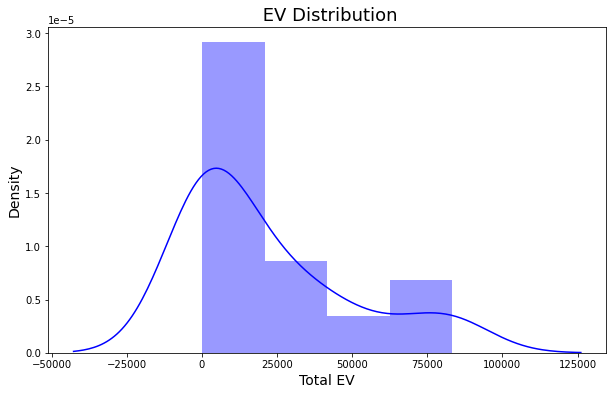

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(data['Total Electric Vehicle'],color='b')
plt.title(' EV Distribution',size=18)
plt.xlabel('Total EV',size=14)
plt.ylabel('Density',size=14)
plt.show()

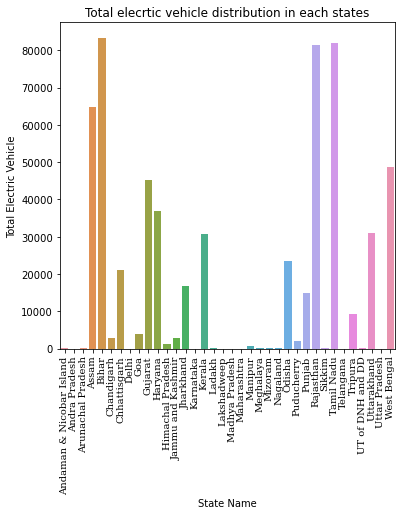

In [44]:
plt.figure(figsize=(6, 6))
sns.barplot(data=data, y=data['Total Electric Vehicle'], x=data['State Name'])
plt.title('Total elecrtic vehicle distribution in each states')
plt.xticks(family='serif')
plt.tick_params(axis='x', rotation=90)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


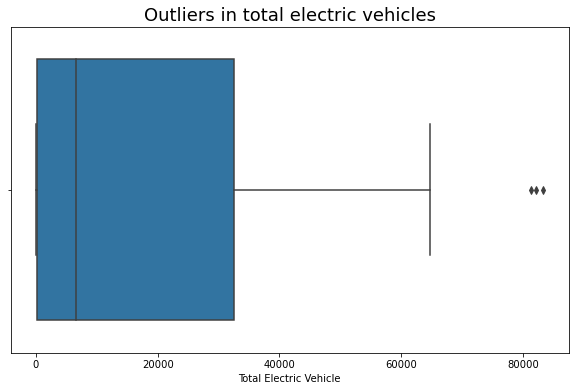

In [37]:
plt.figure(figsize = (10,6))
sns.boxplot(data['Total Electric Vehicle'])
plt.title('Outliers in total electric vehicles',size=18)
plt.show()

# EDA on the EV data set

In [19]:
my_ev_data=pd.read_csv("C:/Users/HP/Downloads/archive (7)/Evehicle_data2020.csv")

In [20]:
my_ev_data.shape

(212, 18)

In [21]:
my_ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Model                        212 non-null    object 
 1   Trans                        212 non-null    object 
 2   Drive                        212 non-null    object 
 3   Fuel                         212 non-null    object 
 4   Stnd                         212 non-null    object 
 5   Stnd Description             212 non-null    object 
 6   Veh Class                    212 non-null    object 
 7   Air Pollution Score          212 non-null    int64  
 8   City MPG                     212 non-null    int64  
 9   Hwy MPG                      212 non-null    int64  
 10  Cmb MPG                      212 non-null    int64  
 11  Greenhouse Gas Score         212 non-null    int64  
 12  SmartWay                     212 non-null    object 
 13  EV battery capacity 

In [22]:
my_ev_data.head()

,Model,Trans,Drive,Fuel,Stnd,Stnd Description,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,EV battery capacity,Charge point capacity,Charge point plug type,Number of days battery used,Charge Time(min)
0,BYD e6,Auto-1,2WD,Electricity,B1,Federal Tier 2 Bin 1,small SUV,10,73,71,72,10,Elite,38.3 kWh,270 kW DC,Type 1,10,30.0
1,CHEVROLET Bolt EV,CVT,2WD,Electricity,T3B0,Federal Tier 3 Bin 0,station wagon,10,127,108,118,10,Elite,33.0 kWh,270 kW DC,Type 2,7,35.0
2,CHEVROLET Bolt EV,CVT,2WD,Electricity,ZEV,California ZEV,station wagon,10,127,108,118,10,Elite,35.8 kWh,250 kW DC,Type 2,9,35.0
3,HYUNDAI Ioniq Electric,Auto-1,2WD,Electricity,T3B0,Federal Tier 3 Bin 0,midsize car,10,145,121,133,10,Elite,38.3 kWh,230 kW,Type 3,10,25.0
4,HYUNDAI Ioniq Electric,Auto-1,2WD,Electricity,ZEV,California ZEV,midsize car,10,145,121,133,10,Elite,38.3 kWh,230 kW,Type 3,10,25.0


## Number of vehicle classes manufactured

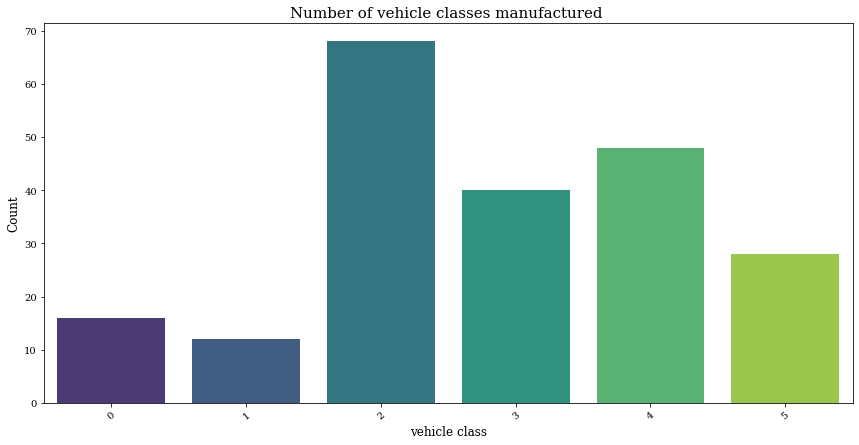

In [49]:
sns.catplot(data= my_ev_data, x='Veh Class', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('vehicle class',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of vehicle classes manufactured ', family='serif', size=15)
plt.show()

## Electronic Vehicle Models Manufactured

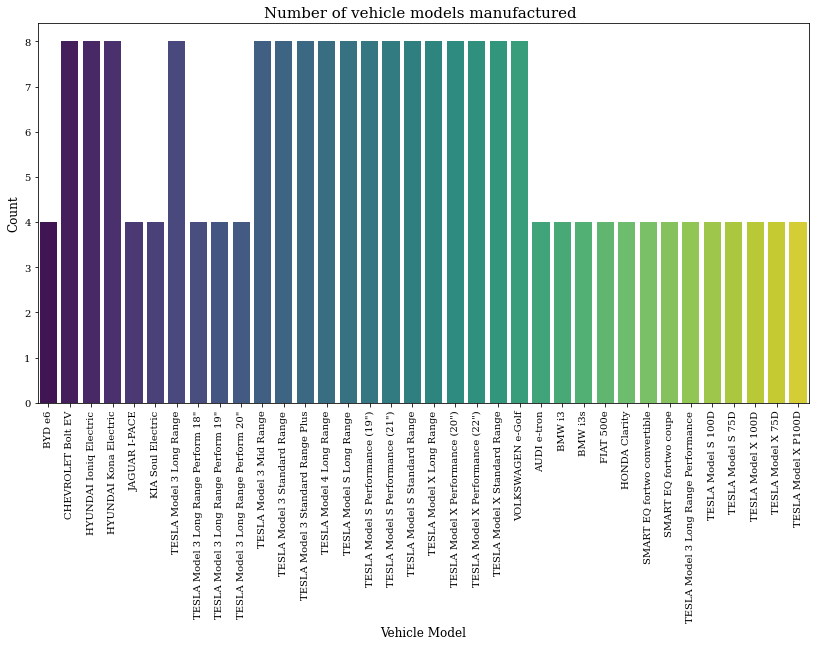

In [52]:
sns.catplot(data= my_ev_data, x='Model', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Vehicle Model',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of vehicle models manufactured ', family='serif', size=15)
plt.show()

## Available Plug Types of EVs

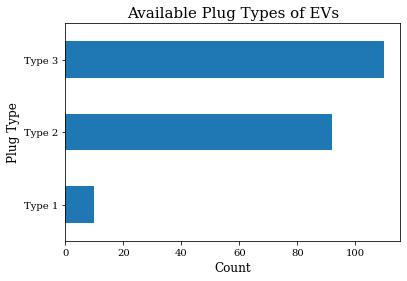

In [55]:
my_ev_data['Charge point plug type'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs', family='serif', size=15)
plt.show()
     

## Battery capacity of different EVs

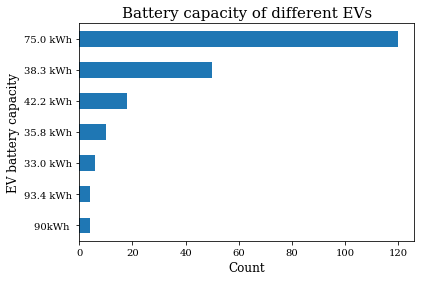

In [59]:
my_ev_data['EV battery capacity'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('EV battery capacity', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Battery capacity of different EVs', family='serif', size=15)
plt.show()

## Charging time of different EVs

In [ ]:
Charge Time(min)

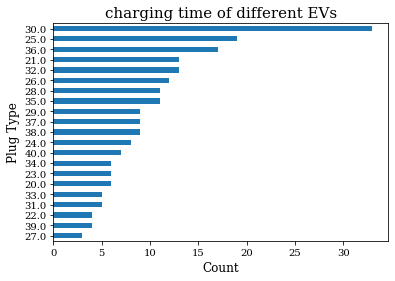

In [58]:
my_ev_data['Charge Time(min)'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('charging time', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('charging time of different EVs', family='serif', size=15)
plt.show()

## Correlation Between Variables

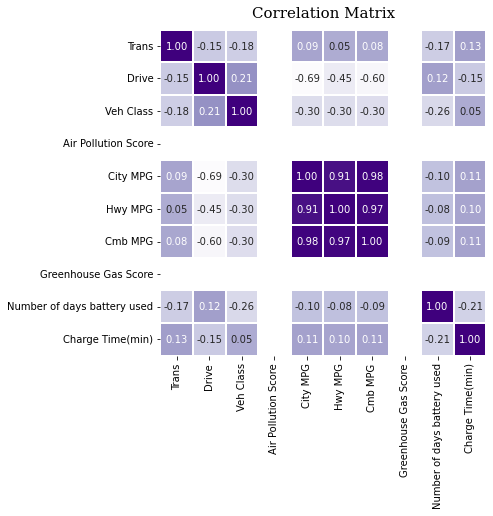

In [60]:
plt.figure(figsize=(6,6))
sns.heatmap(data=my_ev_data.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);
     

In [23]:
my_ev_data['Drive'].unique()

array(['2WD', '4WD'], dtype=object)

There are 2 different values in column 'Drive' such as 2WD and 4WD

In [24]:
my_ev_data['Trans'].unique()

array(['Auto-1', 'CVT'], dtype=object)

There are 2 different values in column 'trans' such as Auto-1 and CVT

In [25]:
my_ev_data['Veh Class'].unique()

array(['small SUV', 'station wagon', 'midsize car', 'large car',
       'standard SUV', 'small car'], dtype=object)

There are different class of vehicles in the data set as small SUV', 'station wagon', 'midsize car', 'large car',
       'standard SUV' and 'small car 

## Model Building Using K-Means Clusteing

In [26]:
my_ev_data['Drive'].replace(to_replace=['2WD','4WD'],value=[0, 1],inplace=True)


my_ev_data['Trans'].replace(to_replace=['Auto-1','CVT'],value=[0, 1],inplace=True)

my_ev_data['Veh Class'].replace(to_replace=['small SUV', 'station wagon', 'midsize car', 'large car',
       'standard SUV', 'small car'],value=[0, 1,2,3,4,5],inplace=True)

In [27]:
my_ev_data

,Model,Trans,Drive,Fuel,Stnd,Stnd Description,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,EV battery capacity,Charge point capacity,Charge point plug type,Number of days battery used,Charge Time(min)
0,BYD e6,0,0,Electricity,B1,Federal Tier 2 Bin 1,0,10,73,71,72,10,Elite,38.3 kWh,270 kW DC,Type 1,10,30.0
1,CHEVROLET Bolt EV,1,0,Electricity,T3B0,Federal Tier 3 Bin 0,1,10,127,108,118,10,Elite,33.0 kWh,270 kW DC,Type 2,7,35.0
2,CHEVROLET Bolt EV,1,0,Electricity,ZEV,California ZEV,1,10,127,108,118,10,Elite,35.8 kWh,250 kW DC,Type 2,9,35.0
3,HYUNDAI Ioniq Electric,0,0,Electricity,T3B0,Federal Tier 3 Bin 0,2,10,145,121,133,10,Elite,38.3 kWh,230 kW,Type 3,10,25.0
4,HYUNDAI Ioniq Electric,0,0,Electricity,ZEV,California ZEV,2,10,145,121,133,10,Elite,38.3 kWh,230 kW,Type 3,10,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,"TESLA Model X Performance (22"")",0,1,Electricity,ZEV,California ZEV,4,10,80,77,79,10,Elite,38.3 kWh,130 kW DC,Type 3,10,34.0
208,TESLA Model X Standard Range,0,1,Electricity,T3B0,Federal Tier 3 Bin 0,4,10,105,98,101,10,Elite,38.3 kWh,250 kW DC,Type 2,9,37.0
209,TESLA Model X Standard Range,0,1,Electricity,ZEV,California ZEV,4,10,105,98,101,10,Elite,38.3 kWh,250 kW DC,Type 2,9,22.0
210,VOLKSWAGEN e-Golf,0,0,Electricity,T3B0,Federal Tier 3 Bin 0,5,10,126,111,119,10,Elite,35.8 kWh,230 kW,Type 2,7,36.0


In [28]:
X = my_ev_data[['Drive','Trans','Veh Class']]
     

# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
     

# applying Principle Component Analysis (PCA)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca.head()

,PC1,PC2,PC3
0,1.794334,-1.117951,0.927880
1,5.340411,4.988307,-1.233233
2,5.340411,4.988307,-1.233233
3,0.924305,-0.834494,-0.172834
4,0.924305,-0.834494,-0.172834


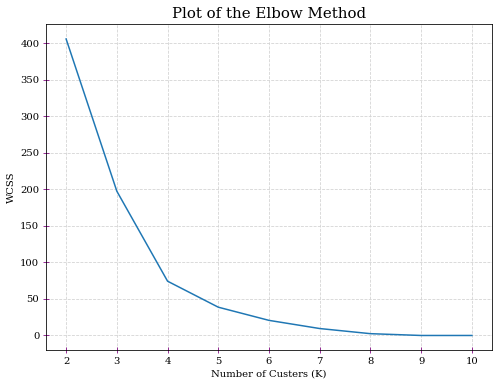

In [29]:
wcss = []

for i in range(2, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()


In [30]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [31]:
print(kmean.labels_)

[0 3 3 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 2 2 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 2 2 2 2 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 3 3 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 2 2 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1]


In [32]:
pd.Series(kmean.labels_).value_counts()

2    112
0     68
1     28
3      4
dtype: int64

## K-Means Clustering Results

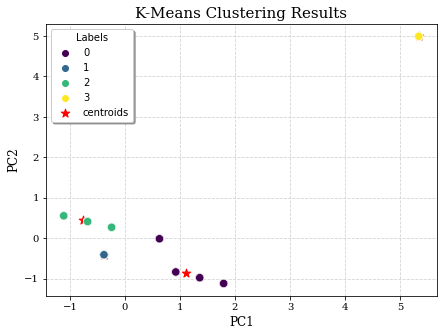

In [33]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC2', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

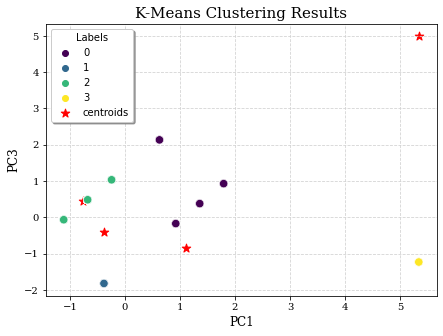

In [34]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC3', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC3', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

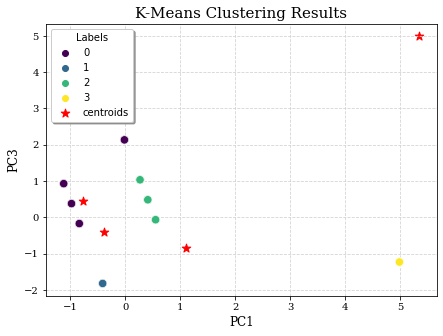

In [61]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC2', y='PC3', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC3', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

## Conclusion

Here we have selected 2 different data sets to analyse market segmentation of electronic vehicles we have analysed the distribution of electronic vehicles in India state wise and also analysed different features in electronic vehicles. We have also formed clusters using k means algorithm on ev data set using specific features in the data set.